In [2]:
import numpy as np           # 데이터를 ndarray 및 행렬 자료구조로 다룰 수 있게 해줌
import pandas as pd          # 데이터를 table 자료구조(dataframe)로 다룰 수 있게 해줌
import matplotlib.pyplot as plt   # 2차원 그래프를 나타내는데 용이함
import seaborn as sns             # 수준높은 시각화를 가능하게 함

In [3]:
from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow import keras 두개 라이브러리 추가하면 에러남

df = pd.read_csv("C:/Users/Parkjunhan/Desktop/ML_DATA/boston.csv", index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [4]:
# 컬렴명 확인
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [5]:
# 각 feature에 대한 자세한 설명
'''
| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |
'''

'\n| MedInc | 블록의 중간 소득 |\n| HouseAge | 블록의 중간 주택 연도 |\n| AveRooms | 주택 1가구당 평균 방의 수 |\n| AveBedrms | 주택 1가구당 평균 침실의 수 |\n| Population | 인구 |\n| AveOccup |  average house occupancy 평균 주택점유율 |\n| Latitude | 위도 |\n| Longitude | 경도 |\n'

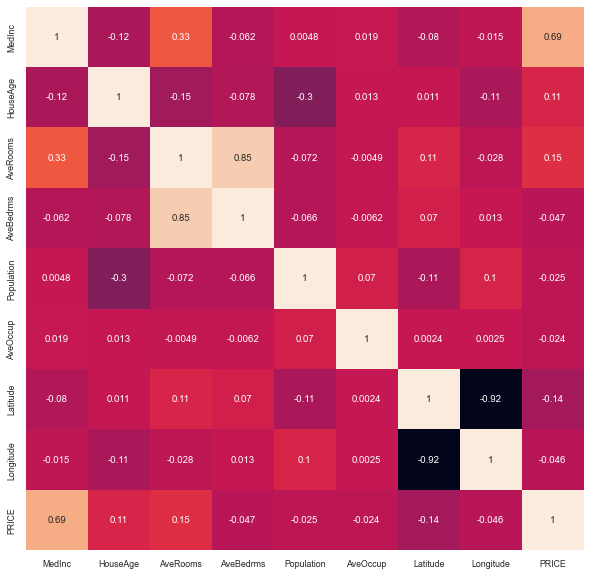

In [6]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()  # pandas라이브러리에 속한 corr()함수를 통해 상관관계 행렬을 생성한 다음, df_corr객체에 저장

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)         # annot=True를 통해 숫자를 화면에 표시해줌
plt.show()

# PRICE와 높은 건  MedInc

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
X = df.drop(['PRICE','HouseAge','AveBedrms','Population','AveOccup','Latitude','Longitude'], axis=1) #새로운 데이터프레임 저장
X.head()

,MedInc,AveRooms
0,8.3252,6.984127
1,8.3014,6.238137
2,7.2574,8.288136
3,5.6431,5.817352
4,3.8462,6.281853


In [14]:
X2 = df.drop(['PRICE','AveBedrms','Population','AveOccup','Latitude','Longitude'], axis=1) #새로운 데이터프레임 저장
X2.head()

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853


In [31]:
Y = df['PRICE'] #pandas의 DataFrame에서 열을 선택하는 문법
Y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [30]:
Y2 = df['PRICE'] #pandas의 DataFrame에서 열을 선택하는 문법
Y2.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [32]:
# 훈련용 x,y 값을 나누는 코드(독립변수 2개)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=12)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(16512, 2) (16512,)
(4128, 2) (4128,)


In [33]:
# 훈련용 x,y 값을 나누는 코드(독립변수3개)
from sklearn.model_selection import train_test_split

X2_train, X2_test, Y2_train, Y2_test=train_test_split(X2,Y2,test_size=0.2,shuffle=True,random_state=12)
print(X2_train.shape, Y2_train.shape)
print(X2_test.shape, Y2_test.shape)

(16512, 3) (16512,)
(4128, 3) (4128,)


In [13]:
# LinearRegression으로 모델학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()            #선형회귀모델 객체생성
model.fit(X_train, Y_train)           # fit함수로 학습
ly_preds = model.predict(X_test)      # 테스트를 위한 입력값에 대한 예측값을 ly_preds 객체에 저장

# 정확도 확인(mse)- 아래 방법3가지
from sklearn.metrics import mean_squared_error

# 방법1
print('평균제곱근오차', mean_squared_error(ly_preds, Y_test)) 

# 방법2
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2) 

print('평균제곱근오차', mse_np(ly_preds, Y_test))

# 방법3
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, Y_test))

평균제곱근오차 0.6916011698420803
평균제곱근오차 0.6916011698420803
평균제곱근오차 0.6916011698420814


In [24]:
# LinearRegression으로 모델학습 (독립변수 3개)
from sklearn.linear_model import LinearRegression

model = LinearRegression()            #선형회귀모델 객체생성
model.fit(X2_train, Y2_train)           # fit함수로 학습
ly_preds2 = model.predict(X2_test)      # 테스트를 위한 입력값에 대한 예측값을 ly_preds 객체에 저장

# 정확도 확인(mse)- 아래 방법3가지
from sklearn.metrics import mean_squared_error

# 방법1
print('평균제곱근오차', mean_squared_error(ly_preds2, Y2_test)) 

# 방법2
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2) 

print('평균제곱근오차', mse_np(ly_preds2, Y2_test))

# 방법3
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds2, Y2_test))

평균제곱근오차 0.6505245697389263
평균제곱근오차 0.6505245697389263
평균제곱근오차 0.6505245697389278


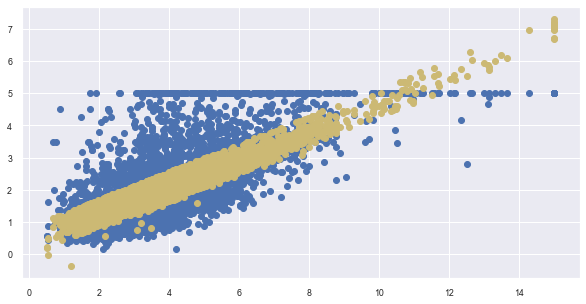

In [18]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], Y_test, label='Y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

In [34]:
# DecisionTreeRegression으로 모델학습 (독립변수 2개)
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, Y_test))

평균제곱근오차 1.186319013707558


In [37]:
# DecisionTreeRegression으로 모델학습 (독립변수 3개)
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X2_train, Y2_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

dy_preds2 = model.predict(X2_test)
print('평균제곱근오차', mean_squared_error(dy_preds2, Y2_test))

평균제곱근오차 1.0576871397923207


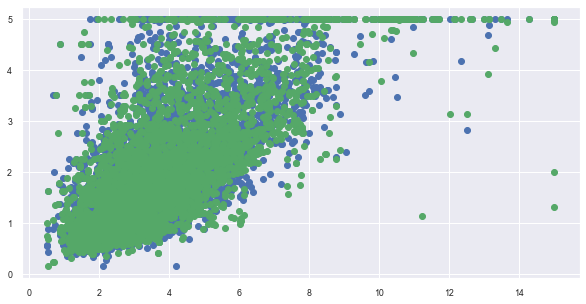

In [48]:
# 예측값과 실제 값 차이를 산점도로 표시, 초록색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], Y_test, label='Y_test')
plt.scatter(X_test['MedInc'], dy_preds, c='g', label='dy_preds')
plt.show()  

In [42]:
# RandomForestRegression으로 모델학습 (독립변수 2개)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, Y_test))

평균제곱근오차 0.6881047806091364


In [43]:
# RandomForestRegression으로 모델학습 (독립변수 3개)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X2_train, Y2_train)

from sklearn.metrics import mean_squared_error

ry_preds2 = model.predict(X2_test)
print('평균제곱근오차', mean_squared_error(ry_preds2, Y2_test))

평균제곱근오차 0.5777559886391651


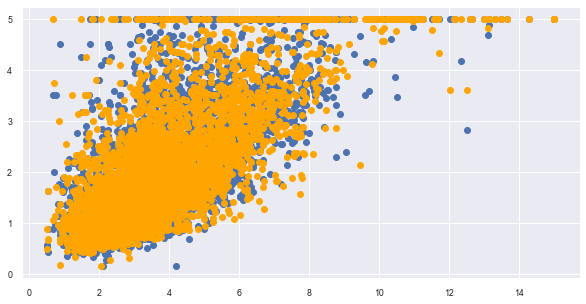

In [35]:
# 예측값과 실제 값 차이를 산점도로 표시, 주황색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], dy_preds, c='orange', label='ry_preds')
plt.show()  

In [49]:
# SVR 모델으로 모델학습 (독립변수 2개)
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, Y_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(sy_preds, Y_test))

평균제곱근오차 0.7195700003756296


In [46]:
# SVR 모델으로 모델학습 (독립변수 3개)
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X2_train, Y2_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

sy_preds2 = model.predict(X2_test)
print('평균제곱근오차', mean_squared_error(sy_preds, Y2_test))

평균제곱근오차 0.7195700003756296


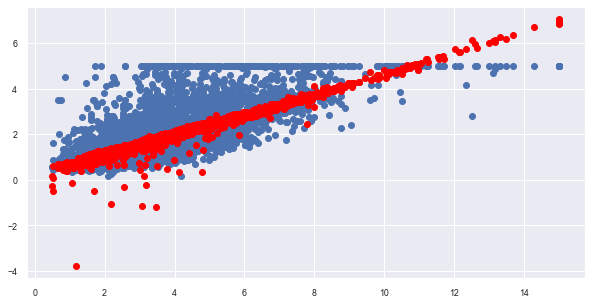

In [40]:
# 예측값과 실제 값 차이를 산점도로 표시, 빨간색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='Y_test')
plt.scatter(X_test['MedInc'], sy_preds, c='red', label='sy_preds')

plt.show()    

In [51]:
# kNN 모델으로 모델학습 (독립변수 2개)
from sklearn.neighbors import KNeighborsRegressor

k = 5  # 이웃의 수
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, Y_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

ky_preds = knn_regressor.predict(X_test)
print('평균제곱근오차', mean_squared_error(ky_preds, Y_test))

평균제곱근오차 0.6881675668607915


In [53]:
# kNN 모델으로 모델학습 (독립변수 3개)
from sklearn.neighbors import KNeighborsRegressor

k = 5  # 이웃의 수
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X2_train, Y2_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

ky_preds = knn_regressor.predict(X2_test)
print('평균제곱근오차', mean_squared_error(ky_preds, Y2_test))

평균제곱근오차 0.6146934180342384


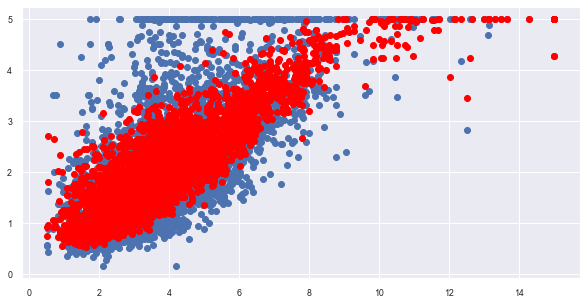

In [52]:
# 예측값과 실제 값 차이를 산점도로 표시, 빨간색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], Y_test, label='Y_test')
plt.scatter(X_test['MedInc'], ky_preds, c='red', label='ky_preds')

plt.show()    